In [1]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('The_Cancer_data_1500_V2.csv')

In [26]:

label_counts = data['Diagnosis'].value_counts()

print(label_counts)


Diagnosis
0    943
1    557
Name: count, dtype: int64


In [30]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data[data['Diagnosis'] == 0]
data_minority = data[data['Diagnosis'] == 1]

# Check class sizes
print(f"Majority class size: {len(data_majority)}, Minority class size: {len(data_minority)}")

# Oversample the minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority),  # match majority class size
                                 random_state=42)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Check the new class distribution
print(data_upsampled['Diagnosis'].value_counts())



Majority class size: 943, Minority class size: 557
Diagnosis
0    943
1    943
Name: count, dtype: int64


In [7]:
data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [9]:
data.shape

(1500, 9)

In [11]:
data.columns.values

array(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype=object)

In [13]:
data.isna().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [36]:
data.dropna(axis=0,inplace=True)

In [16]:
data.duplicated().sum()
data.dropna(axis=0,inplace=True)

In [20]:
# Afficher les valeurs uniques et leur comptage dans la colonne 'CovidPos'
value_counts = data['Diagnosis'].value_counts()

# Afficher les résultats
print(value_counts)

# Afficher également le pourcentage pour mieux comprendre la répartition
value_percent = data['Diagnosis'].value_counts(normalize=True) * 100
print("\nRépartition en pourcentage :\n", value_percent)

Diagnosis
0    943
1    557
Name: count, dtype: int64

Répartition en pourcentage :
 Diagnosis
0    62.866667
1    37.133333
Name: proportion, dtype: float64


In [ ]:
data.columns.values

array(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype=object)

In [22]:
X=data.drop('Diagnosis',axis=1)
y=data['Diagnosis']

age                        0
currentSmoker              0
cigsPerDay                 0
BPMeds                     0
prevalentStroke            0
prevalentHyp               0
diabetes                   0
totChol                    0
sysBP                      0
diaBP                      0
BMI                        0
heartRate                  0
glucose                    0
Gender_Female              0
Gender_Male                0
education_graduate         0
education_postgraduate     0
education_primaryschool    0
education_uneducated       0
dtype: int64

There is a significant relationship between  Gender  and 'Heart_ stroke'.
There is a significant relationship between  education  and 'Heart_ stroke'.
There is no significant relationship between  cigsPerDay  and Heart_ stroke'.
There is a significant relationship between  prevalentStroke  and 'Heart_ stroke'.


array(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'Gender_Female', 'Gender_Male',
       'education_graduate', 'education_postgraduate',
       'education_primaryschool', 'education_uneducated'], dtype=object)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data =pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaled_data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03
mean,-9.473903e-18,2.368476e-17,-1.184238e-17,7.579123e-17,-8.230453e-17,-1.065814e-16,-1.042129e-16,-2.131628e-17
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00
min,-1.719300e+00,-9.815043e-01,-1.731284e+00,-6.071352e-01,-7.495063e-01,-1.708610e+00,-1.703339e+00,-4.101516e-01
25%,-8.687227e-01,-9.815043e-01,-8.343276e-01,-6.071352e-01,-7.495063e-01,-8.597355e-01,-8.509669e-01,-4.101516e-01
50%,3.855949e-02,-9.815043e-01,1.178442e-02,-6.071352e-01,-7.495063e-01,-2.220201e-02,-2.467948e-02,-4.101516e-01
75%,8.891366e-01,1.018844e+00,8.768491e-01,1.647080e+00,7.239661e-01,8.767141e-01,8.229493e-01,-4.101516e-01
max,1.683008e+00,1.018844e+00,1.721922e+00,1.647080e+00,2.197439e+00,1.778817e+00,1.810718e+00,2.438123e+00


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define hyperparameter grid
param_grid = {'n_neighbors': range(1, 10), 'weights': ['distance']}

# Create KNN classifier
knn = KNeighborsClassifier()
# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10), 'weights': ['distance']})

In [32]:
# Get the best parameters and model
best_params2 = grid_search.best_params_
best_model2 = grid_search.best_estimator_
print(best_params2)
print(best_model2)

{'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(weights='distance')


In [34]:
# Evaluate on the validation set
from sklearn.metrics import accuracy_score
y_val_pred2 = best_model2.predict(X_val)
val_accuracy2 = accuracy_score(y_val, y_val_pred2)
print("Validation accuracy:", val_accuracy2)

Validation accuracy: 0.6755555555555556


In [36]:
# Evaluate on the test set
y_test_pred2= best_model2.predict(X_test)
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Test accuracy:", test_accuracy2)

Test accuracy: 0.6711111111111111


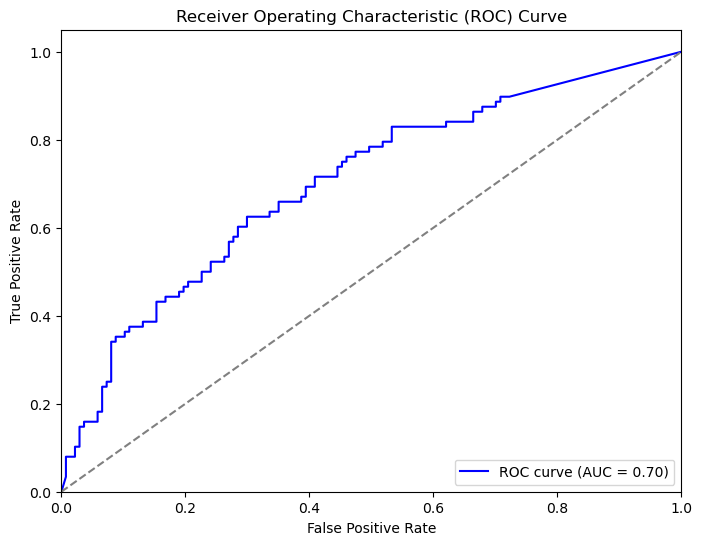

ROC AUC Score: 0.70


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Predict probabilities for the test set
y_test_proba = best_model2.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score using the encoded labels
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_proba)
roc_auc = roc_auc_score(y_test_encoded, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")


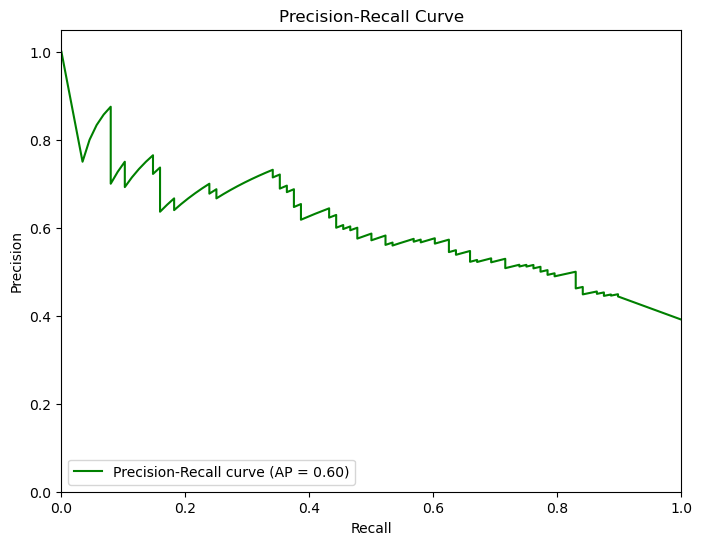

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Now use y_test_encoded in precision-recall and ROC calculations
y_test_proba = best_model2.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_test_proba)
average_precision = average_precision_score(y_test_encoded, y_test_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {average_precision:.2f})", color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')

# Define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# Create KNN classifier

# Perform grid search cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\AQ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AQ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [44]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(best_model)

{'C': 10}
LogisticRegression(C=10, class_weight='balanced')


In [46]:
# Evaluate on the validation set
from sklearn.metrics import accuracy_score
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.8533333333333334


In [48]:
# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8844444444444445


In [56]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[110  23]
 [ 32 118]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       133
           1       0.84      0.79      0.81       150

    accuracy                           0.81       283
   macro avg       0.81      0.81      0.81       283
weighted avg       0.81      0.81      0.81       283



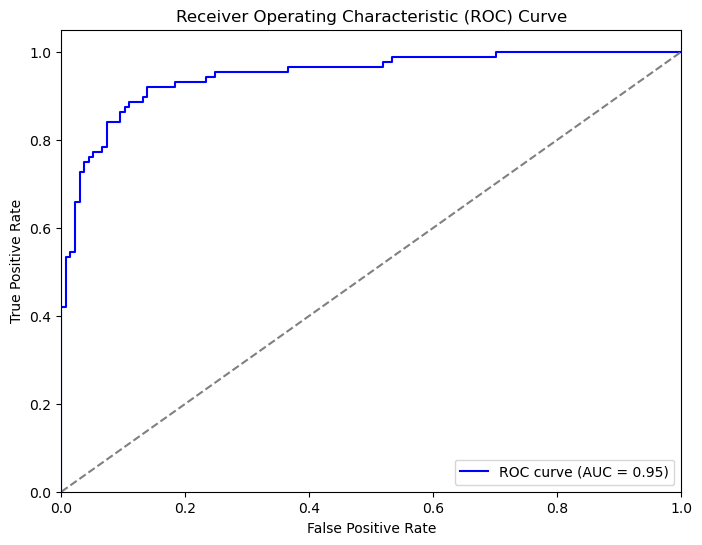

ROC AUC Score: 0.95


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Predict probabilities for the test set
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score using the encoded labels
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_proba)
roc_auc = roc_auc_score(y_test_encoded, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")

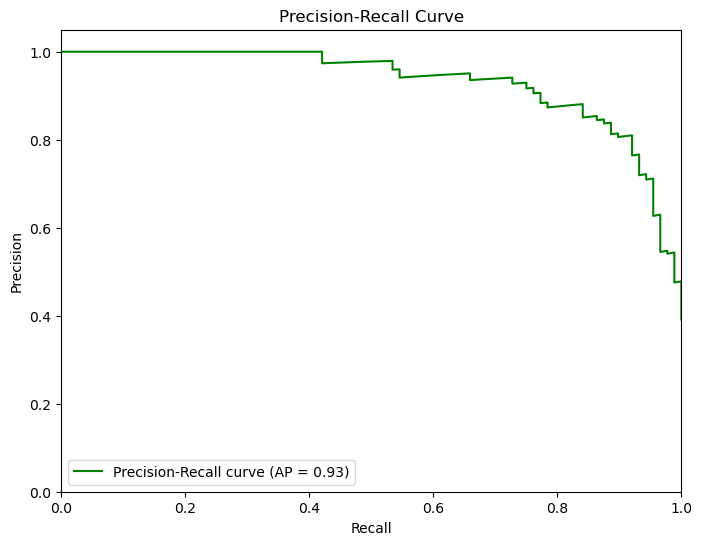

In [52]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Now use y_test_encoded in precision-recall and ROC calculations
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_test_proba)
average_precision = average_precision_score(y_test_encoded, y_test_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {average_precision:.2f})", color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',n_estimators=400,min_samples_leaf=0.12,random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', min_samples_leaf=0.12,
                       n_estimators=400, random_state=42)

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_features': ['auto', 'sqrt', 'log2'],  # Nombre de caractéristiques à considérer pour la meilleure séparation
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis dans un nœud feuille
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Validation croisée à 5 plis
                           verbose=1,
                           n_jobs=-1)  # Utiliser tous les cœurs disponibles

# Ajuster le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\AQ\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_leaf=0.12,
                                              n_estimators=400,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [64]:
from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.9155555555555556


In [66]:
# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.92


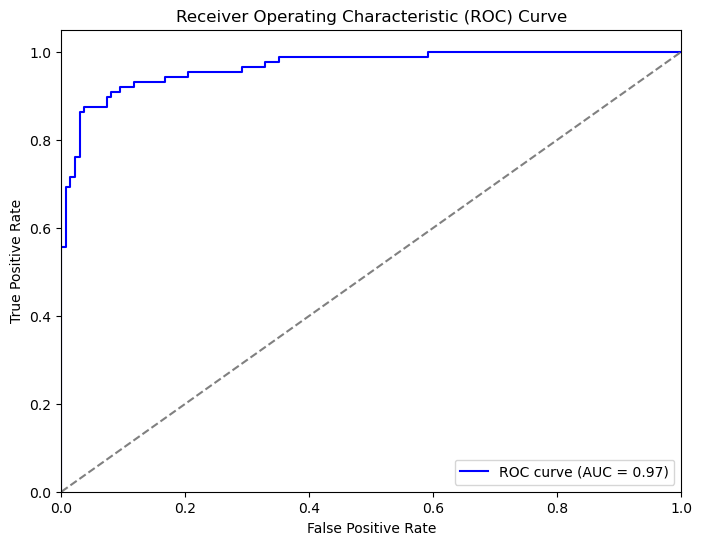

ROC AUC Score: 0.97


In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Predict probabilities for the test set
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score using the encoded labels
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_proba)
roc_auc = roc_auc_score(y_test_encoded, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")

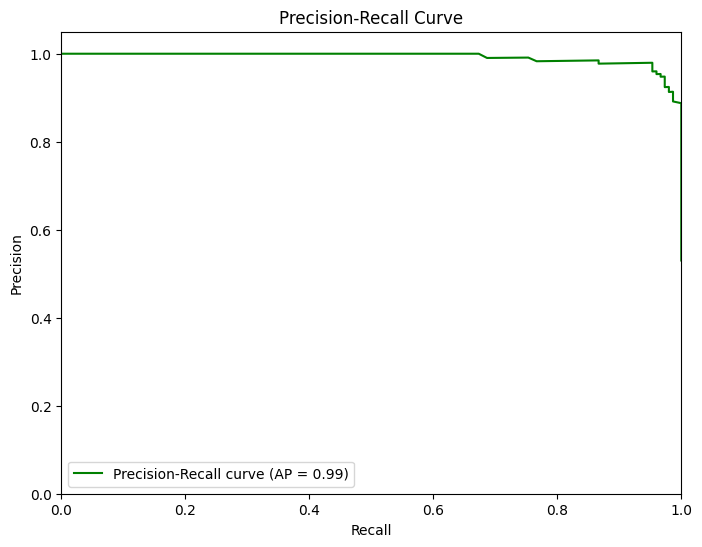

In [78]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Now use y_test_encoded in precision-recall and ROC calculations
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_test_proba)
average_precision = average_precision_score(y_test_encoded, y_test_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {average_precision:.2f})", color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate dt
dt = DecisionTreeClassifier(class_weight='balanced',random_state=100,max_depth=19)
dt.fit(X_train,y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=19, random_state=100)

In [76]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critère pour mesurer la qualité de la séparation
    'max_depth': [None, 5, 10, 15, 20],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis dans un nœud feuille
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Validation croisée à 5 plis
                           verbose=1,
                           n_jobs=-1)  # Utiliser tous les cœurs disponibles

# Ajuster le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=19, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [80]:
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur l'ensemble de test

y_pred = best_model.predict(X_test)



Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy sur l'ensemble de test: 0.92


In [82]:
from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.8666666666666667


In [84]:
# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8488888888888889


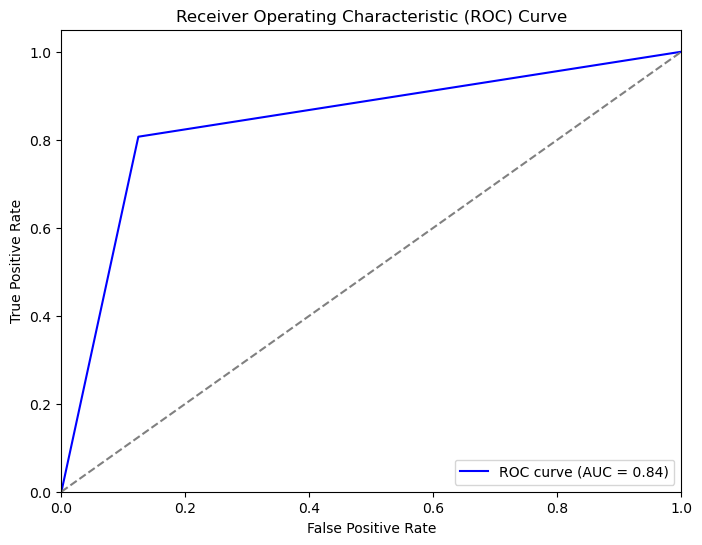

ROC AUC Score: 0.84


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Predict probabilities for the test set
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score using the encoded labels
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_proba)
roc_auc = roc_auc_score(y_test_encoded, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")

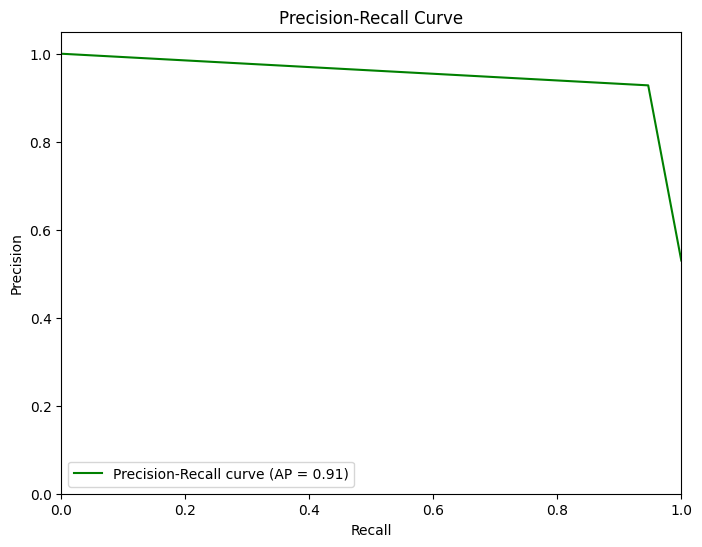

In [70]:

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels into binary values (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Now use y_test_encoded in precision-recall and ROC calculations
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_test_proba)
average_precision = average_precision_score(y_test_encoded, y_test_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {average_precision:.2f})", color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [72]:
import xgboost as xgb

In [ ]:
pip install xgboost